<a href="https://colab.research.google.com/github/sohi-kim/ML04_Test/blob/main/5_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%9C_%EB%85%BC%EB%A6%AC%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 논리 회귀 (Logistic Regression)

- 논리 회귀는 분류 기법 중 하나이며

- 주어진 입력 데이터를 기반으로 두 가지 이상의 범주로 분류하는 지도 학습 알고리즘입니다. 주로 이진 분류 문제에 사용되며, 입력 변수의 선형 결합을 통해 특정 사건이 발생할 확률을 예측합니다.


$$f(x) = \frac{1}{1 + e^{-x}}$$

-  알고리즘은 __시그모이드(Sigmoid) 함수__ 입니다. 머신러닝 분류에 사용되므로 로지스틱 함수라고도 합니다. 비선형 함수를 사용하여 예측값을 0과 1 사이의 확률로 변환합니다.
- 모델의 결과는 일반적으로 특정 임계값(예: 0.5)을 기준으로 두 범주 중 하나로 분류됩니다.
    * 예를 들면, 0.7이면 1, 0.3 이면 0으로 하여 분류합니다.
    * S자 곡선을 그리므로 미분 가능한 형태를 가지고 있어서 최적화가 용이(미분이 가능하다는 것은 학습시키기에 적합)
    * 예를 들어, 이메일이 스팸인지 아닌지를 판별하거나 환자의 병 진단 여부를 예측하는 데 사용될 수 있습니다. 논리 회귀는 계산이 비교적 간단하고 해석이 용이하여 머신러닝에서 널리 사용되는 알고리즘입니다.
- 선형회귀의 학습 결과를 시그모이드 함수에 통과시켜 결과 값을 특정 클래스에 속할 확률로 해석합니다.    


#### 1. 단항 논리 회귀(Logistic Regression)

- 종속 변수가 1개

- 입력 값 \\( x \\)가 **매우 큰 양수**일 때:
  - \\( e^{-x} \\)는 거의 **0에 가까워집니다**.
  - 따라서 결과는 **1에 가까워집니다**.

- 입력 값 \\( x \\)가 **매우 큰 음수**일 때:
  - \\( e^{-x} \\)는 **매우 큰 값이 됩니다**.
  - 따라서 결과는 **0에 가까워집니다**.

- 입력 값 \\( x \\)가 **0일 때**:
  - \\( e^0 = 1 \\)이므로, 결과는 \\( \frac{1}{1 + 1} = 0.5 \\)가 됩니다.


### 시그모이드 함수 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


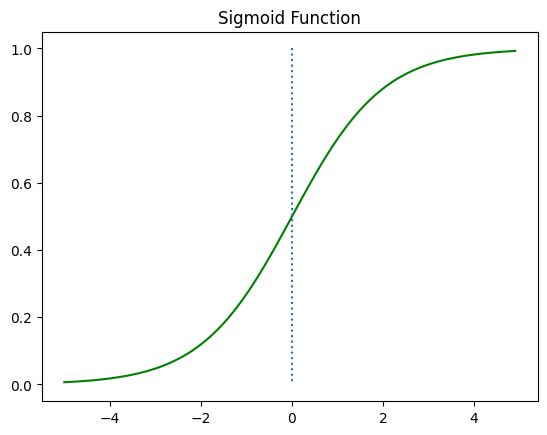

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


- 가중치 변경

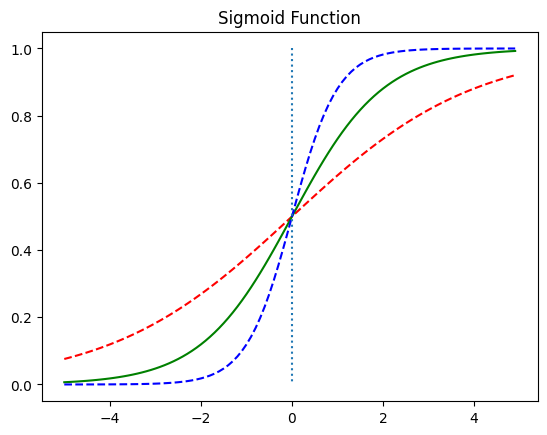

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))    # e^-x

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)    # w=0.5, 값을 작게
y2 = sigmoid(x)
y3 = sigmoid(2*x)      # w=2, 값을 크게

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


- 바이어스(편향) b 조정

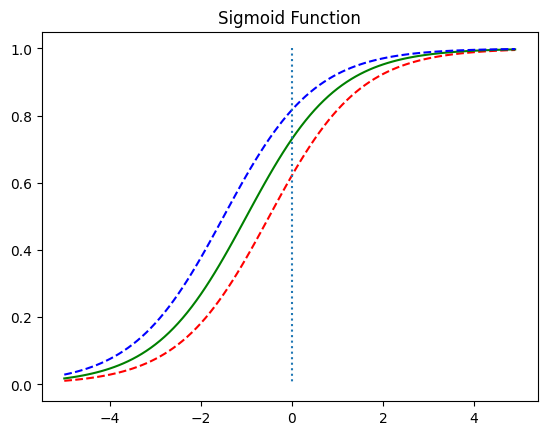

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


### 이진 분류 : 로지스틱 회귀 예시

- https://www.kaggle.com/datasets/rakeshrau/social-network-ads/data

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import csv
from torch.utils.data import Dataset, DataLoader, random_split

In [ ]:
# 1. 데이터 로딩 (pandas는 단순 CSV 로딩용으로 사용)
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.drop(columns=['User ID'],inplace=True)   # 필요없는 컬럼 삭제
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
# Gender: 문자열을 숫자로 변환
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
# numpy 변환
# 정수형은 연속적인 값을 표현하지 못해서, 미세한 가중치 조정이 어려우므로 실수 사용
X = df[['Gender', 'Age', 'EstimatedSalary']].values.astype(np.float32)

# 이진 분류에서 PyTorch의 BCELoss를 사용할 경우, 타겟 y는 2차원 Tensor
y = df['Purchased'].values.astype(np.float32).reshape(-1, 1)
X,y

(array([[1.0e+00, 1.9e+01, 1.9e+04],
        [1.0e+00, 3.5e+01, 2.0e+04],
        [0.0e+00, 2.6e+01, 4.3e+04],
        ...,
        [0.0e+00, 5.0e+01, 2.0e+04],
        [1.0e+00, 3.6e+01, 3.3e+04],
        [0.0e+00, 4.9e+01, 3.6e+04]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
      

- 표준화
  * 각 컬럼의 데이터 값 범위가 다르면 학습의 정확성이 좋지 않음.
  * 데이터의 분포를 정규분포로 변환하는 과정
  * 데이터의 평균  0 이 되도록한다.(데이터의 중심이 0. zero-centered)
  * 표준 편차 1 이 되도록 한다. (대부분 값이 -1 에서 1 범위로 분포)
  * 표준화를 통해 데이터가 다른 값끼리 비교하는 것이 가능하다.
   ```
       X' = (X-X평균) / X표준편차
   ```    

In [ ]:
# 수동 표준화
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std
X

array([[ 1.0202041 , -1.7817973 , -1.4900463 ],
       [ 1.0202041 , -0.25358725, -1.4606813 ],
       [-0.9801961 , -1.1132054 , -0.7852897 ],
       ...,
       [-0.9801961 ,  1.1791097 , -1.4606813 ],
       [ 1.0202041 , -0.15807411, -1.0789382 ],
       [-0.9801961 ,  1.0835966 , -0.99084365]], dtype=float32)

In [ ]:
# Tensor 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

X_tensor[:5], y_tensor[:5]

(tensor([[ 1.0202, -1.7818, -1.4900],
         [ 1.0202, -0.2536, -1.4607],
         [-0.9802, -1.1132, -0.7853],
         [-0.9802, -1.0177, -0.3742],
         [ 1.0202, -1.7818,  0.1838]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [ ]:
temp_model = nn.Linear(3,1)
temp_predict = temp_model(X_tensor)   # 선형회귀 통과
temp_predict[:5]

tensor([[ 0.0910],
        [ 0.4372],
        [ 0.0069],
        [-0.0849],
        [-0.3729]], grad_fn=<SliceBackward0>)

In [ ]:
temp_sigmoid = nn.Sigmoid()
temp_predict =temp_sigmoid(temp_predict)   # 시그모이드 통과
temp_predict[:5]

tensor([[0.5227],
        [0.6076],
        [0.5017],
        [0.4788],
        [0.4079]], grad_fn=<SliceBackward0>)

In [ ]:
from sklearn.model_selection import train_test_split

# Train과 Test 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

In [ ]:
# 분류를 위한 선형결합 -> 2가지 모델 연산이 필요 -> Sequential 함수 사용
model=nn.Sequential(
    nn.Linear(3,1),   # 선형회귀 모델 적용 후
    nn.Sigmoid()      # 위 결과값으로 시그모이드 함수 적용
)
model

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
criterion = nn.BCELoss()    # 로지스틱 회귀의 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 3. 학습 루프
epochs = 5001

In [ ]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)       # 전체 학습 데이터를 한 번에 넣음
    loss = criterion(y_pred, y_train)   # 손실함수 계산. loss=nn.BCELoss()(y_pred,y_train) 와 동일함.
    loss.backward()     # 역전파
    optimizer.step()

    if (epoch+1) % 200 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 200, Loss: 0.4883
Epoch 400, Loss: 0.4446
Epoch 600, Loss: 0.4218
Epoch 800, Loss: 0.4083
Epoch 1000, Loss: 0.3994
Epoch 1200, Loss: 0.3933
Epoch 1400, Loss: 0.3888
Epoch 1600, Loss: 0.3854
Epoch 1800, Loss: 0.3829
Epoch 2000, Loss: 0.3809
Epoch 2200, Loss: 0.3793
Epoch 2400, Loss: 0.3780
Epoch 2600, Loss: 0.3769
Epoch 2800, Loss: 0.3761
Epoch 3000, Loss: 0.3754
Epoch 3200, Loss: 0.3748
Epoch 3400, Loss: 0.3743
Epoch 3600, Loss: 0.3739
Epoch 3800, Loss: 0.3735
Epoch 4000, Loss: 0.3732
Epoch 4200, Loss: 0.3730
Epoch 4400, Loss: 0.3727
Epoch 4600, Loss: 0.3726
Epoch 4800, Loss: 0.3724
Epoch 5000, Loss: 0.3723


In [ ]:
# 4. 평가
model.eval()   #  평가 모드로 전환
with torch.no_grad():   # 자동 미분 비활성화 (메모리 & 속도 절약)
    y_pred = model(X_test)   # X_test 평가용 데이터를 모델에 적용하여 예측값 y_pred 구함.
    predicted = (y_pred > 0.5).float()       # 참이면 1, 거짓이면 0
    acc = (predicted == y_test).float().mean()   # 예측값을 평가용 정답과 비교하여 일치하면 합하여 평균을 구함
    print(f"\nTest Accuracy: {acc:.4f}")

# 예측값,  예측값을 0,1변환, 실제값 (5개만 눈으로 비교)
y_pred[:5], predicted[:5],y_test[:5]


Test Accuracy: 0.8875


(tensor([[0.2432],
         [0.9721],
         [0.0203],
         [0.8452],
         [0.0146]]),
 tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]]),
 tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]]))

In [ ]:
list(model.parameters())

# 2. 비용 함수
* 논리 회귀에서는 nn.BCELoss() 함수를 사용한다.
* Binary Cross Entropy
*(분류 문제에서는 이산형 데이터이다.) (예측선을 확률로 계산하는 시그모이드는 오차값을 다르게 계산한다.)


# 3. 다항 논리 회귀

- 종속 변수가 세 개 이상의 범주로 나뉘는 다중 클래스 분류 문제를 해결하는 알고리즘입니다. 이 알고리즘은 각 클래스에 대한 확률을 예측하기 위해 소프트맥스(Softmax) 함수를 사용합니다.
- 소프트맥스 함수는 각 클래스에 속할 확률을 0과 1 사이의 값으로 변환하며, 모든 클래스의 확률 합이 1이 되도록 정규화합니다.
- 모델은 입력 데이터가 특정 클래스에 속할 가능성을 계산한 뒤, 가장 높은 확률을 가진 클래스를 최종 예측 값으로 선택합니다. 다항 논리 회귀는 자연어 처리, 이미지 분류, 그리고 다양한 다중 클래스 분류 문제에서 널리 사용됩니다.

In [ ]:
x_train=[[1,2,1,1],
         [2,1,3,2],
         [3,1,3,4],
         [4,1,5,5],
         [1,7,5,5],
         [1,4,5,9],
         [1,7,7,7],
         [2,8,7,8]]
y_train=[0,0,0,1,1,1,2,2]

# 가중치,독립변수 4개, 레이블은 클래스가 3개


In [ ]:
# 예시 : 와인 품종 예측하기